### Train Test Split returns 4 numpy arrays  .
**input can be panda series or numpy array**

In [61]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow import keras
import matplotlib.pyplot as plt

### 4.2. Prepare Input Data for Deep Learning

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scaling the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [3]:
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# number of rows and columns in the dataframe
iris_data.shape

(150, 5)

In [5]:
# getting more information about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# getting some statistical measures about the data
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking for missing values in each column
iris_data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
# distribution of target Variable
iris_data['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
# grouping the data bas3ed on the target variable
iris_data.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Label Encoding the Species Data

In [30]:
#Use a Label encoder to convert String to numeric values
#for the target variable
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Separating the features & Target (Both way: FYI go to top)

In [32]:
X = iris_data.drop(columns=['Species'], axis=1)
Y = iris_data['Species']


#Separate feature and target variables
#Convert input to numpy array
iris_data_numpy= iris_data.to_numpy()
X_data = iris_data_numpy[:,0:4]
Y_data=iris_data_numpy[:,4]


In [ ]:
print(X_data,Y_data)

In [34]:
print(type(Y),type(Y_data), X.shape, X_data.shape)

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> (150, 4) (150, 4)


In [35]:
#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [36]:
Y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Data Standardization

In [23]:
scaler = StandardScaler()

In [38]:
scaler.fit(X_data)
X_data = scaler.transform(X_data)

In [41]:
X_data[:5,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [44]:
Y_data[48:56,]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

### Splitting the data to training data & Test data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data , test_size=0.2, random_state=2, stratify =Y_data)

In [57]:
print(X_data.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [58]:
print(X_train)

[[ 3.10997534e-01 -3.62176246e-01  5.35408562e-01  2.64141916e-01]
 [-9.00681170e-01  5.58610819e-01 -1.16971425e+00 -9.20547742e-01]
 [-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.02184904e+00  5.58610819e-01 -1.34022653e+00 -1.31544430e+00]
 [ 1.64384411e+00  1.24920112e+00  1.33113254e+00  1.71209594e+00]
 [ 6.86617933e-02 -1.31979479e-01  2.51221427e-01  3.95774101e-01]
 [-2.94841818e-01 -1.31979479e-01  4.21733708e-01  3.95774101e-01]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [ 1.89829664e-01 -3.62176246e-01  4.21733708e-01  3.95774101e-01]
 [-4.16009689e-01 -1.28296331e+00  1.37546573e-01  1.32509732e-01]
 [-9.00681170e-01  1.70959465e+00 -1.22655167e+00 -1.31544430e+00]
 [ 1.89829664e-01 -1.97355361e+00  1.37546573e-01 -2.62386821e-01]
 [ 5.53333275e-01 -1.74335684e+00  3.64896281e-01  1.32509732e-01]
 [-4.16009689e-01 -1.74335684e+00  1.37546573e-01  1.32509732e-01]
 [-7.79513300e-01  2.40018495e+00 -1.28338910e+00 -1.44707648e

In [59]:
Y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

###  Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [60]:
#Number of classes in the target variable
num_class=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(num_class,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training and evaluating the Model

Training the model involves defining various training models and then perform
forward and back propagation.

In [62]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Epoch 1/10
6/6 [==============================] - 1s 64ms/step - loss: 0.8070 - accuracy: 0.7708 - val_loss: 0.6809 - val_accuracy: 0.8333
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.5496 - accuracy: 0.8333 - val_loss: 0.5618 - val_accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 0s 13ms/step - loss: 0.4473 - accuracy: 0.8125 - val_loss: 0.5005 - val_accuracy: 0.8333
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 0.3829 - accuracy: 0.8125 - val_loss: 0.4654 - val_accuracy: 0.8333
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 0.3487 - accuracy: 0.8438 - val_loss: 0.4318 - val_accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 0.3173 - accuracy: 0.8438 - val_loss: 0.4096 - val_accuracy: 0.8333
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.2921 - accuracy: 0.8750 - val_loss: 0.3858 - val_accuracy: 0.8333
Epoch 8/10
6/6 [===========

### Plotting the accuracy against epoch

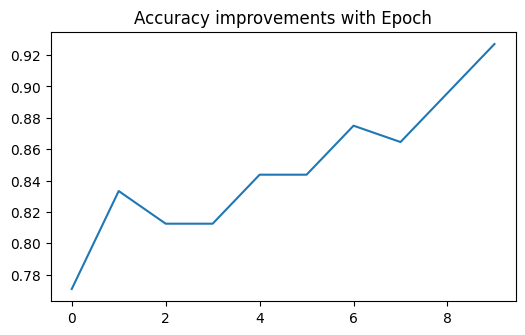

In [64]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(6, 3.5))
plt.title("Accuracy improvements with Epoch")
plt.show()

### Evaluation against the test Data

In [66]:
#Evaluate the model against the test dataset and print results
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1635 - accuracy: 0.9667


[0.16354914009571075, 0.9666666388511658]

### Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [67]:
#Saving a model

model.save("iris_save.keras")

#Loading a Model
loaded_model = keras.models.load_model("iris_save.keras")

#Print Model Summary
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predictions with Deep Learning Models

In [73]:
#Raw prediction data
prediction_input = [[5.4,3.4,1.7,0.2]]
##or
"""
input_data = (6.4,3.1,5.5,1.8)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
prediction_input = input_data_as_numpy_array.reshape(1,-1)

"""

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = loaded_model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction

prediction = np.argmax(raw_prediction)
print(prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 47ms/step
Raw Prediction Output (Probabilities) : [[0.00414612 0.14066106 0.85519284]]
2
Prediction is  ['virginica']
